# Preprocessing of Brain cells in Mouse Organogenesis Spatiotemporal Transcriptomic Atlas (MOSTA)

Data from [[1]](https://doi.org/10.1016/j.cell.2022.04.003) as provided in [MOSTA](https://db.cngb.org/stomics/mosta/):
1. Full Embryo: [Mouse_embryo_all_stage.h5ad](https://ftp.cngb.org/pub/SciRAID/stomics/STDS0000058/stomics/Mouse_embryo_all_stage.h5ad)
2. Brain: [E16.5_E1S3_cell_bin_whole_brain.h5ad](https://ftp.cngb.org/pub/SciRAID/stomics/STDS0000058/stomics/E16.5_E1S3_cell_bin_whole_brain.h5ad)


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

In [3]:
from datetime import datetime
import os
import sys
import numpy as np
from copy import copy
import scanpy as sc

from matplotlib.colors import ListedColormap
import matplotlib.collections as collections
import anndata
import colorcet as cc

import seaborn as sns
from matplotlib import colors as mcolors, pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Set parameters

In [5]:
sys.path.insert(
    0, "../../../../"
)  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, FIG_DIR

FIG_DIR = FIG_DIR / "space/spatiotemporal"
DATA_DIR = DATA_DIR / "space/spatiotemporal"

from pathlib import Path
DATA_DIR = Path("/cs/labs/mornitzan/zoe.piran/research/projects/moscot_framework_analysis/data/mosta/")

## Preprocess data (brain)

In [6]:
adata_E165_brain = sc.read(DATA_DIR / "E16.5_E1S3_cell_bin_whole_brain.h5ad")

In [7]:
adata_E165_brain.obs["time"] = 16.5
adata_E165_brain.X = adata_E165_brain.layers["counts"].copy()

In [8]:
adata_all = sc.read(DATA_DIR / "Mouse_embryo_all_stage.h5ad")

In [9]:
adata_all.obs["time"] = adata_all.obs["timepoint"].copy()
adata_all.obs["time"] = adata_all.obs["time"].cat.rename_categories(lambda x: float(x.split("E")[1]))
adata_all.obs["time"] = adata_all.obs["time"].astype(float)

In [10]:
adata_all.obs["time"].value_counts()

16.5    121767
15.5    113350
14.5    102519
13.5     77369
12.5     51365
11.5     30124
10.5     18408
9.5       5913
Name: time, dtype: int64

In [11]:
adata_all = adata_all[adata_all.obs["time"] < 16.5].copy()
adata_all.obs["time"].value_counts()

15.5    113350
14.5    102519
13.5     77369
12.5     51365
11.5     30124
10.5     18408
9.5       5913
Name: time, dtype: int64

In [12]:
shared_annt = adata_all.obs["annotation"].cat.categories[adata_all.obs["annotation"].cat.categories.isin(adata_E165_brain.obs["annotation"].cat.categories)]

In [13]:
## remove the `Epidermis` and `Choroid plexus` from E16.5
adata_E165_brain = adata_E165_brain[~adata_E165_brain.obs["annotation"].isin(["Epidermis", "Choroid plexus"])].copy()
adata_E165_brain.obs["annotation"].cat.categories

Index(['Cajal-Retzius cell', 'Cerebellar granule neuroblasts',
       'Cortical glutamatergic neuron', 'Cortical intermediate progenitor',
       'Cortical or hippocampal glutamatergic neuron', 'Cranium fibroblast',
       'Diencephalon glutamatergic neuron', 'Dopaminergic neuron',
       'Dorsal hindbrain radial glia', 'Endothelial cell', 'Erythrocyte',
       'Fibroblast', 'Forebrain GABAergic neuroblast',
       'Forebrain GABAergic neuron', 'Forebrain glutamatergic neuroblast',
       'Forebrain neuroblast', 'Forebrain radial glia', 'Hindbrain glioblast',
       'Hindbrain glutamatergic neuroblast', 'Hindbrain glutamatergic neuron',
       'Hindbrain neuroblast', 'Hypothalamus neuron',
       'Midbrain glutamatergic neuroblast', 'Midbrain glutamatergic neuron',
       'Midbrain radial glia', 'Mixed region GABAergic neuron',
       'Mixed region glioblast', 'Mixed region neuron', 'Motor neuron',
       'Olfactory neuron', 'Unknown',
       'Ventromedial hypothalamus GABAergic neuron

In [14]:
## retain `Brain` from earlier time points
adata_all_brain = adata_all[adata_all.obs["annotation"].isin(["Brain"])].copy()

In [15]:
adata_all_brain.X = adata_all_brain.layers["count"].copy()

In [16]:
sns.color_palette(adata_E165_brain.uns["sim anno_colors"])

[(1.0, 1.0, 0.0),
 (0.10980392156862745, 0.9019607843137255, 1.0),
 (0.0, 0.43529411764705883, 0.6509803921568628),
 (0.6392156862745098, 0.0, 0.34901960784313724),
 (1.0, 0.8941176470588236, 0.8823529411764706),
 (0.0, 0.0, 0.6509803921568628),
 (0.7176470588235294, 0.592156862745098, 0.3843137254901961),
 (0.7294117647058823, 0.03529411764705882, 0.0),
 (0.0, 0.30196078431372547, 0.2627450980392157),
 (0.5607843137254902, 0.6901960784313725, 1.0),
 (0.35294117647058826, 0.0, 0.027450980392156862),
 (0.30980392156862746, 0.7764705882352941, 0.00392156862745098),
 (0.10588235294117647, 0.26666666666666666, 0.0),
 (0.23137254901960785, 0.36470588235294116, 1.0),
 (1.0, 0.1843137254901961, 0.5019607843137255),
 (0.38823529411764707, 1.0, 0.6745098039215687),
 (0.5019607843137255, 0.5882352941176471, 0.5764705882352941),
 (0.4196078431372549, 0.4745098039215686, 0.0),
 (1.0, 0.6666666666666666, 0.5725490196078431),
 (0.0, 0.7607843137254902, 0.6274509803921569),
 (1.0, 0.5647058823529412, 0.788235294117647),
 (0.8666666666666667, 0.9372549019607843, 1.0),
 (0.6313725490196078, 0.7607843137254902, 0.6),
 (0.4823529411764706, 0.30980392156862746, 0.29411764705882354),
 (0.0392156862745098, 0.6509803921568628, 0.8470588235294118),
 (0.0, 0.6274509803921569, 0.5294117647058824),
 (0.30196078431372547, 0.7333333333333333, 0.8352941176470589),
 (0.9019607843137255, 0.29411764705882354, 0.20784313725490197),
 (0.23529411764705882, 0.32941176470588235, 0.5333333333333333),
 (0.9529411764705882, 0.5176470588235295, 0.0),
 (0.6313725490196078, 0.792156862745098, 0.9450980392156862),
 (0.7607843137254902, 0.6980392156862745, 0.5019607843137255)]

In [17]:
adata_brain = anndata.concat([adata_all_brain, adata_E165_brain,],)
adata_brain

AnnData object with n_obs × n_vars = 133303 × 22396
    obs: 'annotation', 'n_genes_by_counts', 'total_counts', 'time'
    obsm: 'spatial'

In [18]:
adata_brain.obs["annotation"] = adata_brain.obs["annotation"].astype("category")
adata_brain.obs["annotation"]

168_137-0                            Brain
195_147-0                            Brain
195_148-0                            Brain
195_152-0                            Brain
196_146-0                            Brain
                          ...             
CELL.70555          Mixed region glioblast
CELL.70556          Mixed region glioblast
CELL.70557    Dorsal hindbrain radial glia
CELL.70558    Dorsal hindbrain radial glia
CELL.70560                Endothelial cell
Name: annotation, Length: 133303, dtype: category
Categories (33, object): ['Brain', 'Cajal-Retzius cell', 'Cerebellar granule neuroblasts', 'Cortical glutamatergic neuron', ..., 'Motor neuron', 'Olfactory neuron', 'Unknown', 'Ventromedial hypothalamus GABAergic neuron']

In [19]:
adata_brain.uns["annotation_colors"] = np.concatenate((adata_all_brain.uns["annotation_colors"], adata_E165_brain.uns["sim anno_colors"]))

In [20]:
adata_brain.layers["counts"] = adata_brain.X.copy()

### basic filtering

In [21]:
sc.pp.filter_cells(adata_brain, min_genes=200)
sc.pp.filter_genes(adata_brain, min_cells=3)

In [22]:
adata_brain.var["mt"] = adata_brain.var_names.str.startswith("mt-")  # annotate the group of mitochondrial genes as "mt" (#13 genes.. )
sc.pp.calculate_qc_metrics(adata_brain, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

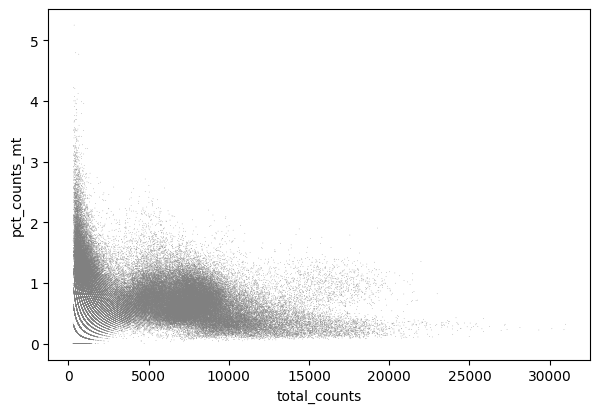

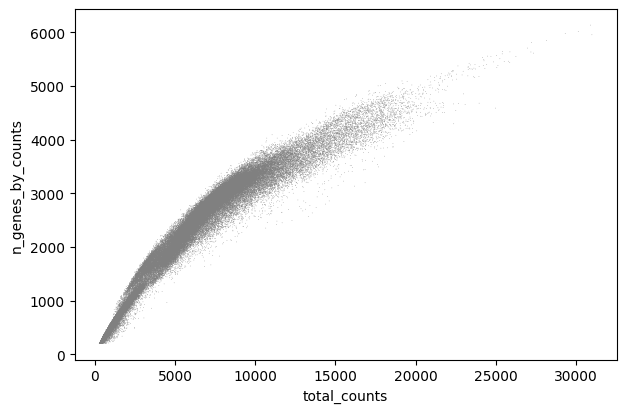

In [23]:
sc.pl.scatter(adata_brain, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata_brain, x="total_counts", y="n_genes_by_counts")

In [24]:
sc.pp.highly_variable_genes(adata_brain, flavor="seurat_v3", n_top_genes=2000, subset=False)

In [25]:
sc.pp.normalize_total(adata_brain)

In [26]:
sc.pp.log1p(adata_brain)

In [27]:
sc.pp.pca(adata_brain, use_highly_variable=True)

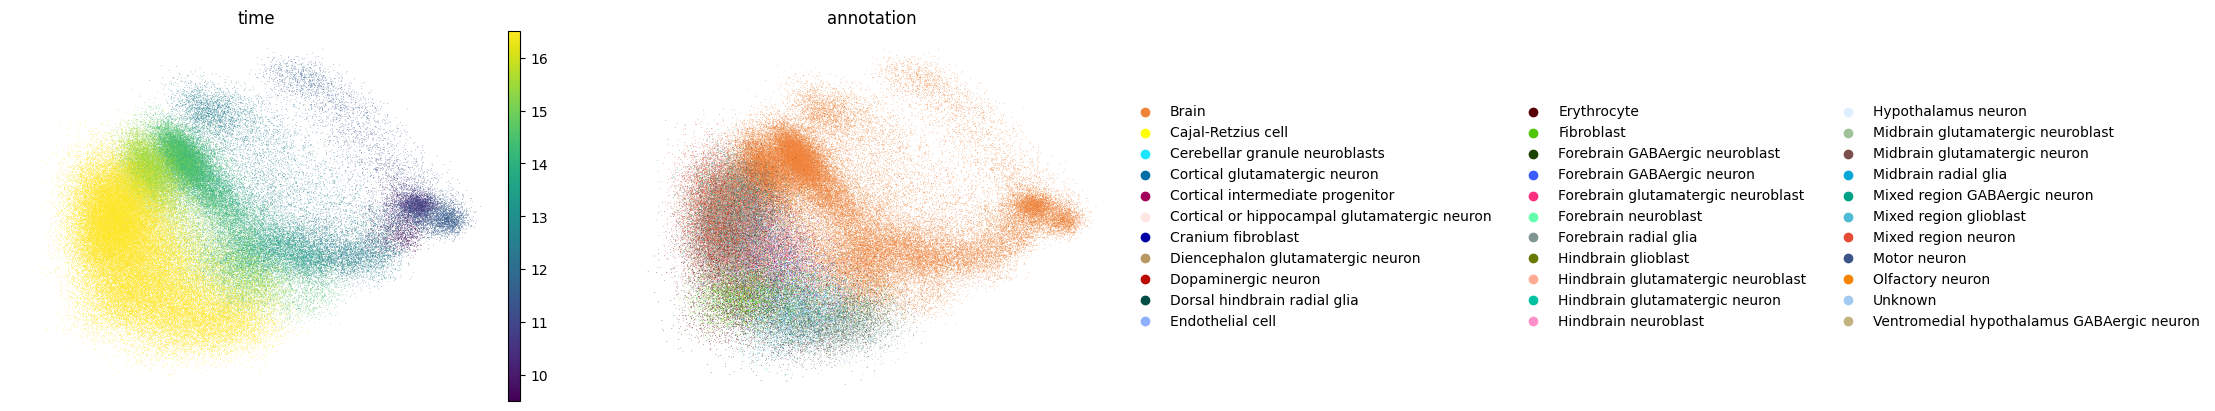

In [28]:
sc.pl.pca(adata_brain, color=["time", "annotation"], frameon=False)

In [29]:
sc.pp.neighbors(adata_brain)
sc.tl.umap(adata_brain)

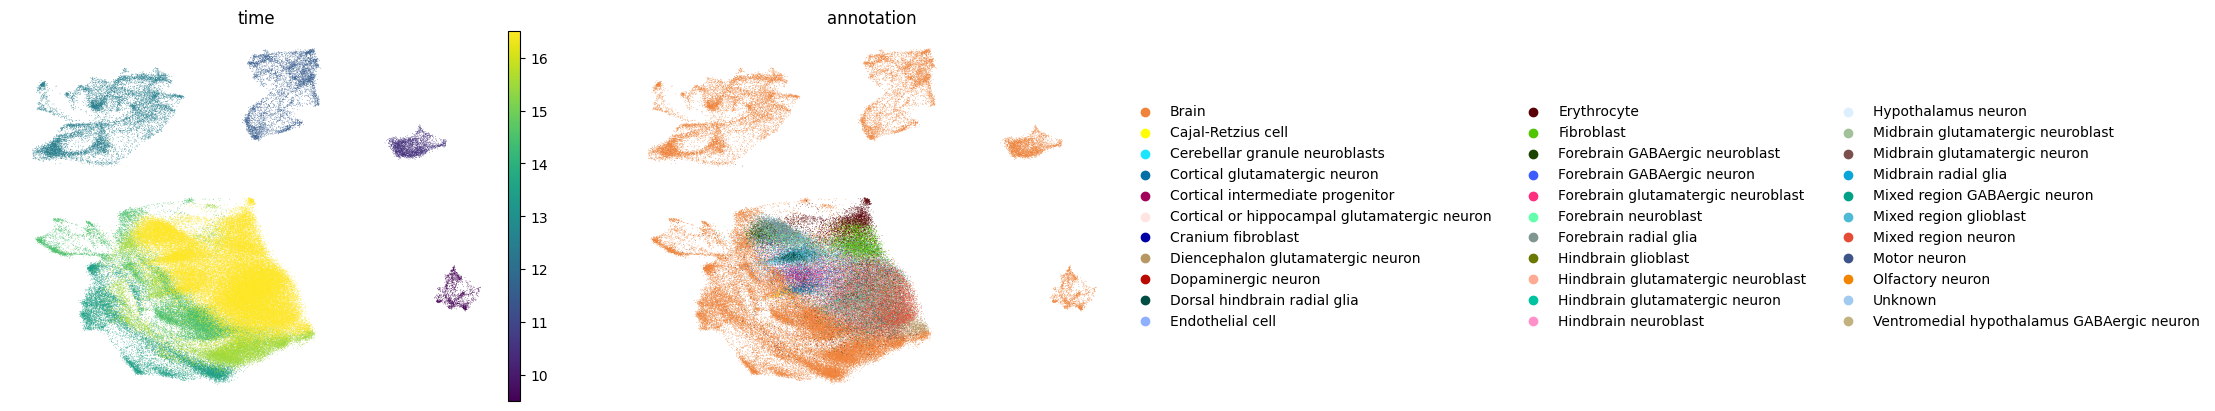

In [30]:
sc.pl.umap(adata_brain, color=["time", "annotation"], frameon=False)

In [31]:
adata_brain.obs["cell_names"] = adata_brain.obs_names

In [ ]:
adata_brain.write(DATA_DIR + "mouse_embryo_brain_normalized.h5ad")

[[1] Ao Chen, Sha Liao, Mengnan Cheng, Kailong Ma, Liang Wu, Yiwei Lai, Xiaojie Qiu et al. "Spatiotemporal transcriptomic atlas of mouse organogenesis using DNA nanoball-patterned arrays." Cell (2022)](https://doi.org/10.1016/j.cell.2022.04.003)